In [58]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline
from sklearn import metrics

In [59]:
df = pd.read_csv('./data/total-electricity-consumption-us.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 2 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Year         51 non-null     int64
 1   Consumption  51 non-null     int64
dtypes: int64(2)
memory usage: 944.0 bytes


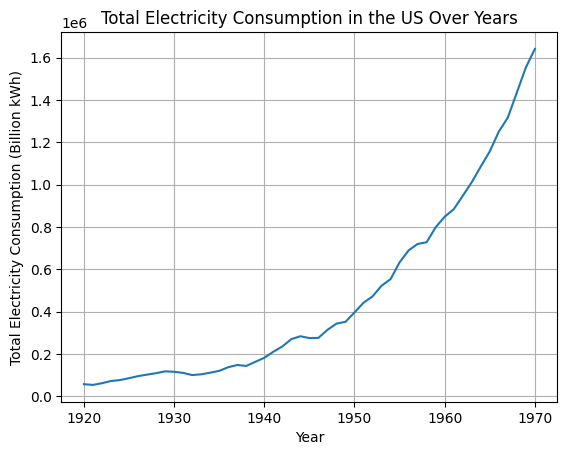

In [60]:
plt.plot(df['Year'], df['Consumption'])
plt.xlabel('Year')
plt.ylabel('Total Electricity Consumption (Billion kWh)')
plt.title('Total Electricity Consumption in the US Over Years')
plt.grid(True)
plt.show()

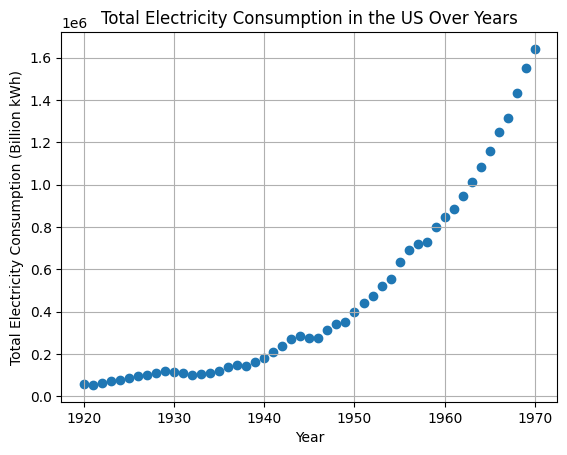

In [61]:
plt.scatter(x=df['Year'], y= df['Consumption'])
plt.xlabel('Year')
plt.ylabel('Total Electricity Consumption (Billion kWh)')
plt.title('Total Electricity Consumption in the US Over Years')
plt.grid(True)
plt.show()

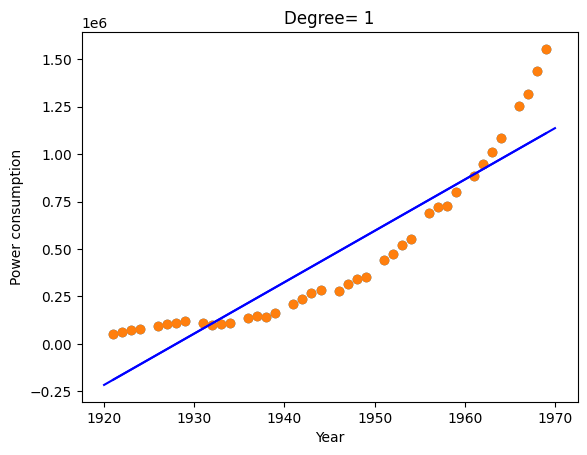

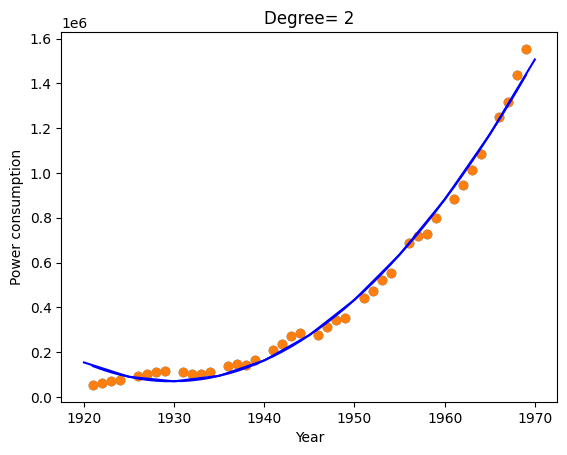

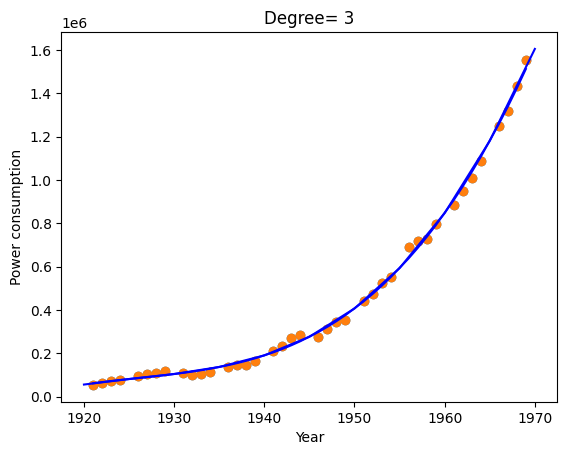

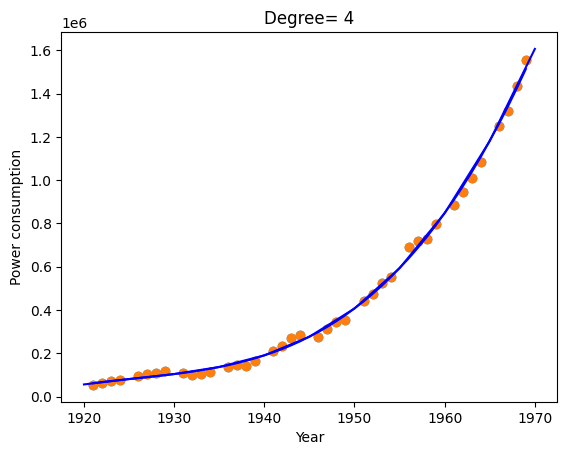

In [62]:
degrees = [1, 2, 3, 4]
r2_train =[]
r2_test = []

size = len(df.index)
index = range(0, size, 5)

train = df[~df.index.isin(index)]
test = df[df.index.isin(index)]
X_train = train.Year.values.reshape(-1,1) #Making X two dimensional
y_train = train.Consumption

X_test = test.Year.values.reshape(-1,1) #Making X two dimensional
y_test = test.Consumption

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                    ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_pred))

    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))

    # plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))

    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train, y_pred_train, color="blue")

    # test data
    ax.scatter(X_train, y_train)
    ax.plot(X_test, y_pred, color="blue")

    plt.show()


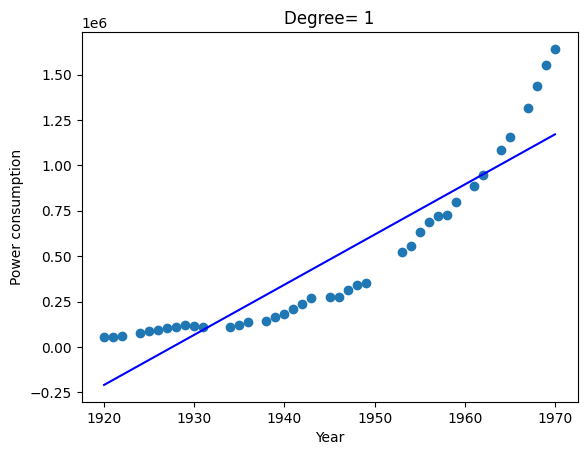

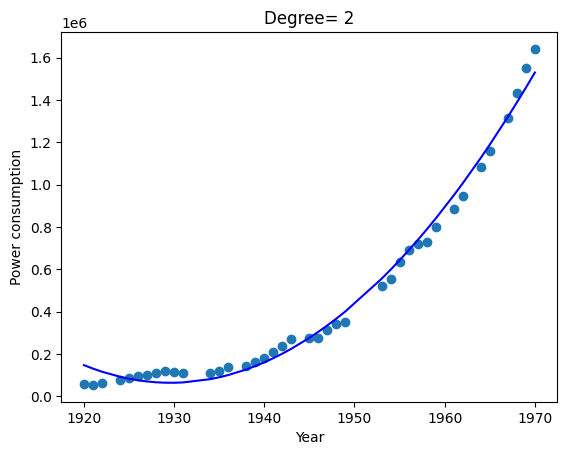

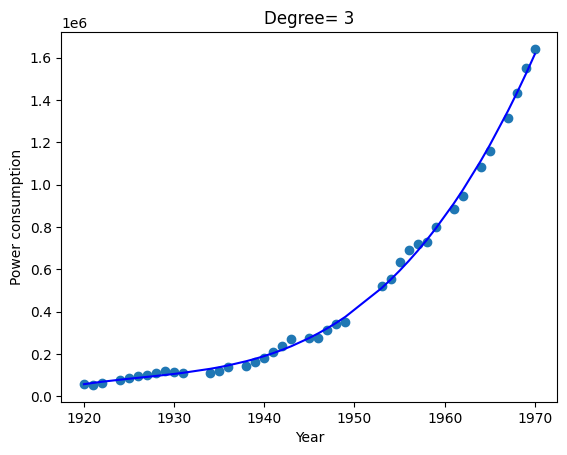

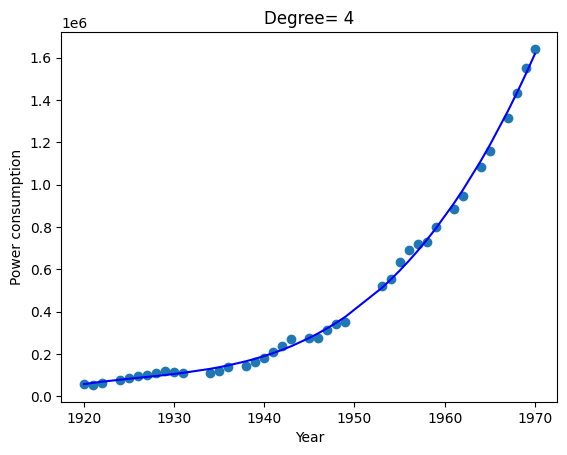

In [63]:
X_train, X_test, y_train, y_test = train_test_split(
    df[['Year']], df['Consumption'], test_size=0.2, random_state=42
)

for degree in degrees:
    pipeline = Pipeline([('poly_features', PolynomialFeatures(degree=degree)),
                    ('model', LinearRegression())])
    pipeline.fit(X_train, y_train)
    y_pred = pipeline.predict(X_test)
    r2_test.append(metrics.r2_score(y_test, y_pred))
    
    # training performance
    y_pred_train = pipeline.predict(X_train)
    r2_train.append(metrics.r2_score(y_train, y_pred_train))
    
    # plot predictions and actual values against year
    fig, ax = plt.subplots()
    ax.set_xlabel("Year")
    ax.set_ylabel("Power consumption")
    ax.set_title("Degree= " + str(degree))
    order = np.argsort(X_train.values.flatten())

    # train data in blue
    ax.scatter(X_train, y_train)
    ax.plot(X_train.values.flatten()[order], y_pred_train[order], color="blue")

    plt.show()